In [38]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.signal import correlate
file = '/content/LJ001-0001.wav'
signal, sample_rate = librosa.load(file, sr=None)
time = np.linspace(0, len(signal) / sample_rate, num=len(signal))

**Function for autocorrelation**

In [39]:
def autocorrelation_pitch(signal, sample_rate):
    autocorr = correlate(signal, signal, mode='full')
    autocorr = autocorr[len(autocorr)//2:]
    peaks = np.argmax(autocorr[1:]) + 1
    pitch = sample_rate / peaks if peaks > 0 else 0
    return pitch

**Function for AMDF**

In [40]:
def amdf_pitch(signal, frame_size, sample_rate):
    amdf_vals = []
    for tau in range(1, frame_size):
        diff = np.sum(np.abs(signal[:-tau] - signal[tau:]))
        amdf_vals.append(diff)
    min_index = np.argmin(amdf_vals) + 1
    pitch = sample_rate / min_index if min_index > 0 else 0
    return pitch

**Function for ASMDF**

In [41]:
def asm_df_pitch(signal, frame_size, sample_rate):
    amdf_vals = []
    for tau in range(1, frame_size):
        diff = np.sum(np.abs(signal[:-tau] - signal[tau:])) / (len(signal) - tau)
        amdf_vals.append(diff)
    min_index = np.argmin(amdf_vals) + 1
    pitch = sample_rate / min_index if min_index > 0 else 0
    return pitch

**Pitch extraction using FFT**

In [42]:
def fft_pitch(signal, sample_rate):
    fft_spectrum = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(fft_spectrum), 1/sample_rate)
    magnitude = np.abs(fft_spectrum)
    peak_index = np.argmax(magnitude[:len(freqs)//2])  # Find the first peak in FFT spectrum
    pitch = freqs[peak_index] if peak_index > 0 else 0
    return pitch

**Computing the pitch via autocorrelation, AMDF and ASMDF**

In [43]:
frame_size = 1024
pitch_autocorr = autocorrelation_pitch(signal[:frame_size], sample_rate)
pitch_amdf = amdf_pitch(signal[:frame_size], frame_size, sample_rate)
pitch_asmdf = asm_df_pitch(signal[:frame_size], frame_size, sample_rate)
pitch_fft = fft_pitch(signal[:frame_size], sample_rate)
print(f"Autocorrelation Pitch: {pitch_autocorr:.2f} Hz")
print(f"AMDF Pitch: {pitch_amdf:.2f} Hz")
print(f"ASMDF Pitch: {pitch_asmdf:.2f} Hz")
print(f"FFT Pitch: {pitch_fft:.2f} Hz")

Autocorrelation Pitch: 22050.00 Hz
AMDF Pitch: 21.55 Hz
ASMDF Pitch: 21.55 Hz
FFT Pitch: 559.86 Hz


**Plotting pitch of speech signal**

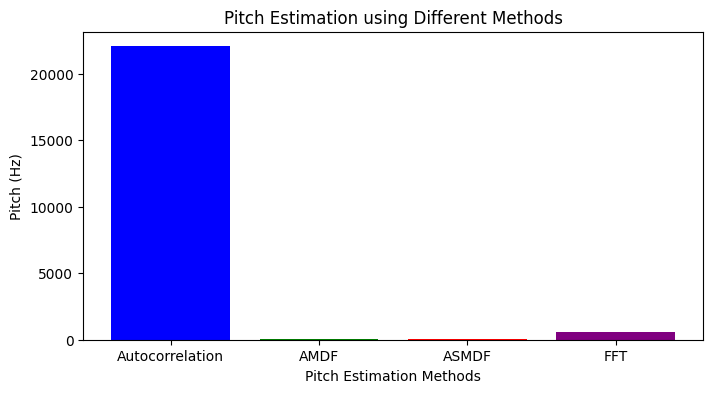

In [44]:
methods = ["Autocorrelation", "AMDF", "ASMDF", "FFT"]
pitches = [pitch_autocorr, pitch_amdf, pitch_asmdf, pitch_fft]
plt.figure(figsize=(8, 4))
plt.bar(methods, pitches, color=['blue', 'green', 'red', 'purple'])
plt.xlabel("Pitch Estimation Methods")
plt.ylabel("Pitch (Hz)")
plt.title("Pitch Estimation using Different Methods")
plt.show()

**FFT Analysis**

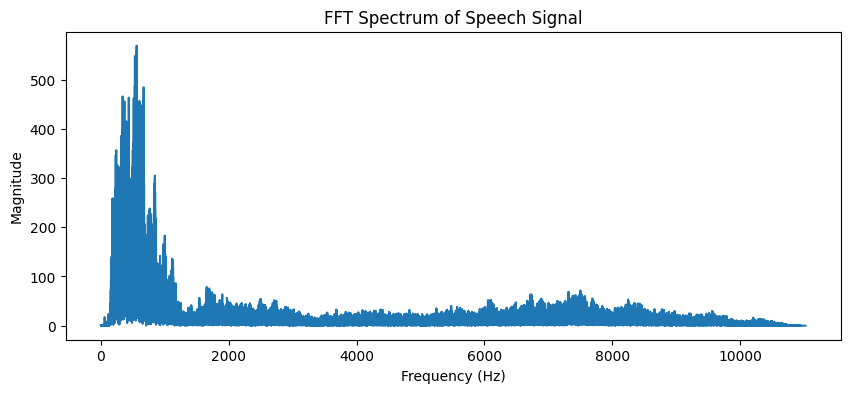

In [45]:
fft_spectrum = np.fft.fft(signal)
freqs = np.fft.fftfreq(len(fft_spectrum), 1/sample_rate)
plt.figure(figsize=(10, 4))
plt.plot(freqs[:len(freqs)//2], np.abs(fft_spectrum[:len(freqs)//2]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT Spectrum of Speech Signal')
plt.show()

**Extracting Harmonics and Formants using FFT**

In [46]:
magnitude = np.abs(fft_spectrum)
peaks = np.argsort(magnitude[:len(freqs)//2])[-5:]
print("Top Harmonic Frequencies:", freqs[peaks])

Top Harmonic Frequencies: [551.11276557 532.88389003 560.64149596 564.16298328 559.81291071]


**Plotting harmonics via FFT**

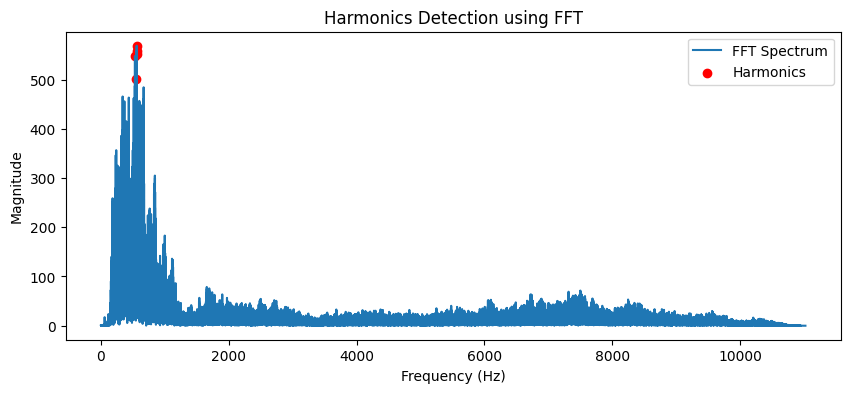

In [47]:
plt.figure(figsize=(10, 4))
plt.plot(freqs[:len(freqs)//2], magnitude[:len(freqs)//2], label="FFT Spectrum")
plt.scatter(freqs[peaks], magnitude[peaks], color='red', label="Harmonics")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Harmonics Detection using FFT')
plt.legend()
plt.show()

**Extracting and plotting formants**

Estimated Formants (FFT): [560.64149596 564.16298328 559.81291071]


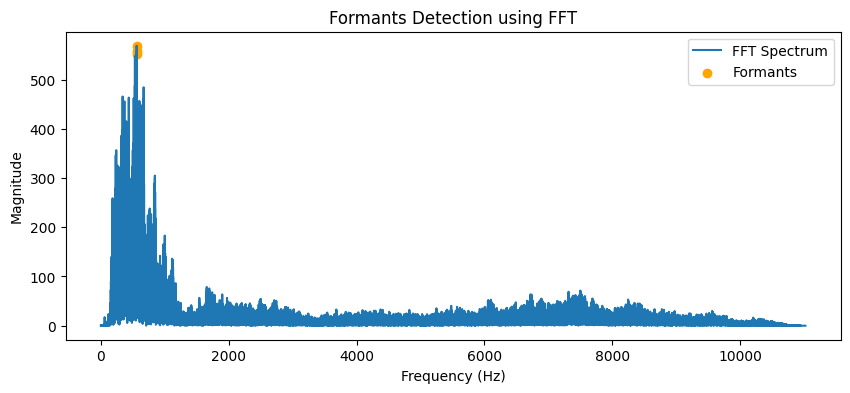

In [48]:
formant_indices = np.argsort(magnitude[:len(freqs)//2])[-3:]  # Top 3 peaks as formants
formant_freqs = freqs[formant_indices]
print("Estimated Formants (FFT):", formant_freqs)

plt.figure(figsize=(10, 4))
plt.plot(freqs[:len(freqs)//2], magnitude[:len(freqs)//2], label="FFT Spectrum")
plt.scatter(freqs[formant_indices], magnitude[formant_indices], color='orange', label="Formants")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Formants Detection using FFT')
plt.legend()
plt.show()

**Extracting Pitch Contour using STFT**

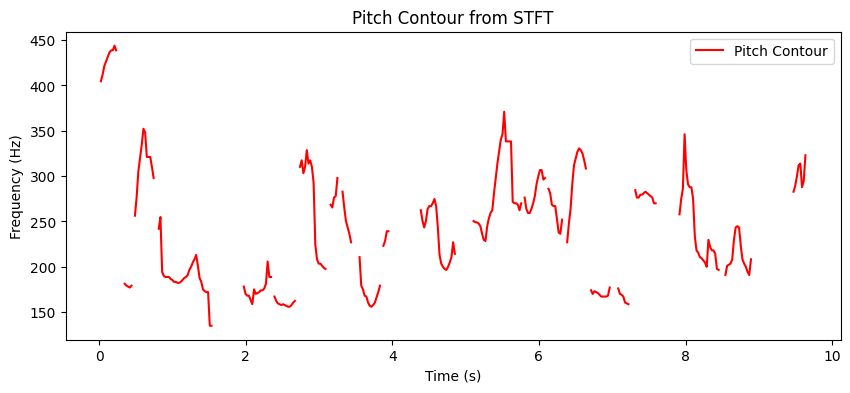

In [49]:
f0, voiced_flag, voiced_probs = librosa.pyin(signal, fmin=50, fmax=500, sr=sample_rate)
time_stft = librosa.times_like(f0, sr=sample_rate)
plt.figure(figsize=(10, 4))
plt.plot(time_stft, f0, label="Pitch Contour", color='r')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Pitch Contour from STFT')
plt.legend()
plt.show()

**Extracting Formants using STFT**

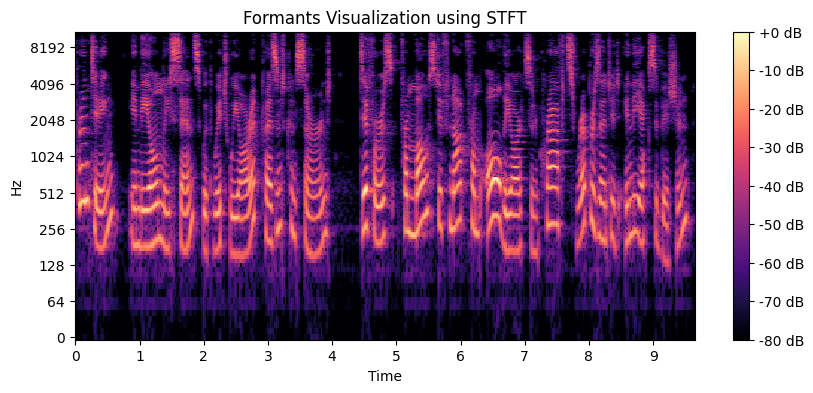

In [51]:
stft_result = np.abs(librosa.stft(signal))
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(stft_result, ref=np.max), sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Formants Visualization using STFT')
plt.show()